# Model Creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, concatenate

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [5]:
from PIL import Image
from tqdm import tqdm
import os

In [3]:
df = pd.read_csv("../Datasets/Extracted_Features.csv")
df.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [4]:
np.array(df['features'][0][1:-1].split(', '), dtype='float64')

array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363937e+01,
       -6.3622660e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274304e+01,  1.0970945e+01, -8.3260610e+00,  8.8020880e+00,
       -3.6699412e+00,  5.7446756e+00, -5.1627830e+00,  7.5170636e-01,
       -1.6878540e+00, -4.0873003e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397805e+00, -4.2828280e+00, -4.2260840e+00,
        9.1518750e-01,  9.1406375e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094346e+00,  2.6984656e+00,  5.6560730e+00, -3.2690074e+00,
       -2.0606379e-01, -2.9996982e+00,  4.4763170e+00, -4.7685504e-01,
        6.0062850e+00, -5.9690364e-02, -3.4585848e+00, -1.8418322e+00])

In [5]:
df['features'] = df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [6]:
df['features'][0]

array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363937e+01,
       -6.3622660e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274304e+01,  1.0970945e+01, -8.3260610e+00,  8.8020880e+00,
       -3.6699412e+00,  5.7446756e+00, -5.1627830e+00,  7.5170636e-01,
       -1.6878540e+00, -4.0873003e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397805e+00, -4.2828280e+00, -4.2260840e+00,
        9.1518750e-01,  9.1406375e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094346e+00,  2.6984656e+00,  5.6560730e+00, -3.2690074e+00,
       -2.0606379e-01, -2.9996982e+00,  4.4763170e+00, -4.7685504e-01,
        6.0062850e+00, -5.9690364e-02, -3.4585848e+00, -1.8418322e+00])

In [7]:
X = np.array(df['features'].tolist())
y = np.array(df['class'].tolist())

In [8]:
X.shape

(999, 40)

In [10]:
# y = np.array(pd.get_dummies(y))
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [11]:
y.shape

(999, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
y_test.shape

(200, 10)

In [15]:
num_classes = y.shape[1]
num_classes

10

In [6]:
def plot_acc(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [72]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

### Simple ANN

In [40]:
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               10496     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                     

In [41]:
num_epochs = 200
num_batch_size = 64

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 39ms/step - loss: 2.7814 - accuracy: 0.1377 - val_loss: 4.1699 - val_accuracy: 0.1063
Epoch 2/200
10/10 [==============================] - 0s 16ms/step - loss: 2.3329 - accuracy: 0.2473 - val_loss: 4.1499 - val_accuracy: 0.1437
Epoch 3/200
10/10 [==============================] - 0s 15ms/step - loss: 2.0751 - accuracy: 0.3380 - val_loss: 3.3728 - val_accuracy: 0.1937
Epoch 4/200
10/10 [==============================] - 0s 15ms/step - loss: 2.0774 - accuracy: 0.3099 - val_loss: 2.8584 - val_accuracy: 0.2188
Epoch 5/200
10/10 [==============================] - 0s 14ms/step - loss: 1.8960 - accuracy: 0.3318 - val_loss: 2.6726 - val_accuracy: 0.2500
Epoch 6/200
10/10 [==============================] - 0s 14ms/step - loss: 1.7859 - accuracy: 0.3944 - val_loss: 2.4142 - val_accuracy: 0.2688
Epoch 7/200
10/10 [==============================] - 0s 14ms/step - loss: 1.7518 - accuracy: 0.4053 - val_loss: 2.1502 - val_accuracy: 0.2875
Epoch 

10/10 [==============================] - 0s 14ms/step - loss: 0.6050 - accuracy: 0.7715 - val_loss: 1.2831 - val_accuracy: 0.6250
Epoch 116/200
10/10 [==============================] - 0s 14ms/step - loss: 0.6377 - accuracy: 0.7449 - val_loss: 1.3234 - val_accuracy: 0.6062
Epoch 117/200
10/10 [==============================] - 0s 13ms/step - loss: 0.5637 - accuracy: 0.7903 - val_loss: 1.3590 - val_accuracy: 0.6000
Epoch 118/200
10/10 [==============================] - 0s 14ms/step - loss: 0.6003 - accuracy: 0.7715 - val_loss: 1.3496 - val_accuracy: 0.6250
Epoch 119/200
10/10 [==============================] - 0s 13ms/step - loss: 0.5951 - accuracy: 0.7887 - val_loss: 1.3439 - val_accuracy: 0.6062
Epoch 120/200
10/10 [==============================] - 0s 14ms/step - loss: 0.6086 - accuracy: 0.7950 - val_loss: 1.3578 - val_accuracy: 0.6125
Epoch 121/200
10/10 [==============================] - 0s 14ms/step - loss: 0.5650 - accuracy: 0.7903 - val_loss: 1.4168 - val_accuracy: 0.6000
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 14ms/step - loss: 0.4652 - accuracy: 0.8310 - val_loss: 1.3856 - val_accuracy: 0.5750
Epoch 173/200
10/10 [==============================] - 0s 13ms/step - loss: 0.5543 - accuracy: 0.8059 - val_loss: 1.4177 - val_accuracy: 0.6250
Epoch 174/200
10/10 [==============================] - 0s 13ms/step - loss: 0.4073 - accuracy: 0.8592 - val_loss: 1.4392 - val_accuracy: 0.6000
Epoch 175/200
10/10 [==============================] - 0s 13ms/step - loss: 0.4901 - accuracy: 0.8232 - val_loss: 1.3982 - val_accuracy: 0.6125
Epoch 176/200
10/10 [==============================] - 0s 14ms/step - loss: 0.4694 - accuracy: 0.8310 - val_loss: 1.4358 - val_accuracy: 0.6125
Epoch 177/200
10/10 [==============================] - 0s 14ms/step - loss: 0.4726 - accuracy: 0.8279 - val_loss: 1.4212 - val_accuracy: 0.6313
Epoch 178/200
10/10 [==============================] - 0s 14ms/step - loss: 0.4849 - accuracy: 0.8388 - val_loss: 1.3935 - val_accuracy:

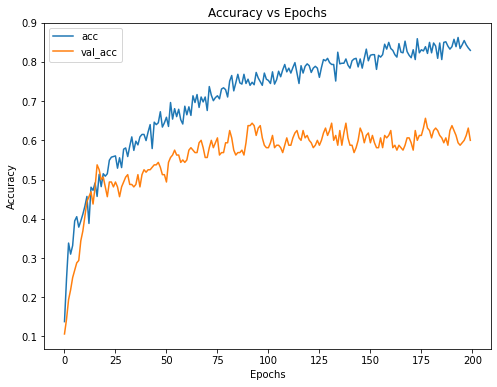

In [42]:
plot_acc(model.history)

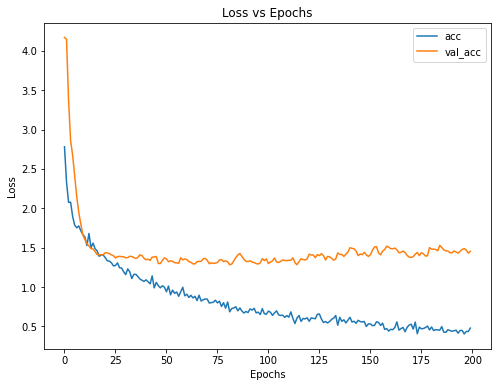

In [43]:
plot_loss(model.history)

## Testing

In [44]:
test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy[1])

7/7 [==============================] - 0s 6ms/step - loss: 1.9150 - accuracy: 0.6000
Test Accuracy: 0.6000000238418579


In [45]:
import librosa

In [46]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_feature.T, axis=0)
    
    return mfcc_scaled_features

In [54]:
def predict(file, label_encoder):
    prediction_feature = feature_extractor(file)
    prediction_feature = prediction_feature.reshape(1, -1)
    preds = model.predict(prediction_feature)
    out = tf.argmax(input=preds, axis=1).numpy()[0]
    
    return label_encoder.inverse_transform([out])

In [55]:
predict('../Data/genres_original/metal/metal.00005.wav', label_encoder)

1/1 [==============================] - 0s 34ms/step


array(['metal'], dtype='<U9')

In [56]:
predict('../Data/Test/VaddiSong.wav', label_encoder)

1/1 [==============================] - 0s 23ms/step


array(['classical'], dtype='<U9')

In [58]:
predict('../Data/Test/ProgrammingInC.wav', label_encoder)

1/1 [==============================] - 0s 19ms/step


array(['blues'], dtype='<U9')

## Using Chroma Features

In [60]:
df = pd.read_csv("../Datasets/Extracted_Features_Chroma.csv")
df.head()

,features,class
0,"[0.36224282, 0.36781698, 0.43983436, 0.2446917...",blues
1,"[0.4600403, 0.35018247, 0.3208068, 0.21147157,...",blues
2,"[0.27290025, 0.19595261, 0.31516546, 0.4079862...",blues
3,"[0.34137166, 0.40862367, 0.52431905, 0.5470129...",blues
4,"[0.1926048, 0.3172665, 0.39202204, 0.25582698,...",blues


In [61]:
np.array(df['features'][0][1:-1].split(', '), dtype='float64')

array([0.36224282, 0.36781698, 0.43983436, 0.24469179, 0.247862  ,
       0.33561644, 0.36461872, 0.43568373, 0.2959856 , 0.3150803 ,
       0.40700835, 0.3851007 ])

In [62]:
df['features'] = df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [63]:
df['features'][0]

array([0.36224282, 0.36781698, 0.43983436, 0.24469179, 0.247862  ,
       0.33561644, 0.36461872, 0.43568373, 0.2959856 , 0.3150803 ,
       0.40700835, 0.3851007 ])

In [64]:
X = np.array(df['features'].tolist())
y = np.array(df['class'].tolist())

In [65]:
X.shape

(999, 12)

In [67]:
# y = np.array(pd.get_dummies(y))
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [68]:
y.shape

(999, 10)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [70]:
num_classes = y.shape[1]
num_classes

10

### Simple ANN

In [80]:
model = Sequential()
model.add(Dense(256, input_shape=(12,), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               3328      
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_23 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 512)               131584    
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_24 (Bat  (None, 512)              2048      
 chNormalization)                                     

In [81]:
num_epochs = 200
num_batch_size = 64

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/200
10/10 [==============================] - 1s 39ms/step - loss: 2.7229 - accuracy: 0.1706 - val_loss: 2.2796 - val_accuracy: 0.1375 - lr: 0.0010
Epoch 2/200
10/10 [==============================] - 0s 17ms/step - loss: 2.3345 - accuracy: 0.2739 - val_loss: 2.2690 - val_accuracy: 0.1125 - lr: 0.0010
Epoch 3/200
10/10 [==============================] - 0s 14ms/step - loss: 2.2877 - accuracy: 0.2911 - val_loss: 2.2643 - val_accuracy: 0.1437 - lr: 0.0010
Epoch 4/200
10/10 [==============================] - 0s 14ms/step - loss: 2.1481 - accuracy: 0.3224 - val_loss: 2.2739 - val_accuracy: 0.1312 - lr: 0.0010
Epoch 5/200
10/10 [==============================] - 0s 15ms/step - loss: 2.0150 - accuracy: 0.3333 - val_loss: 2.2966 - val_accuracy: 0.1187 - lr: 0.0010
Epoch 6/200
10/10 [==============================] - 0s 14ms/step - loss: 1.9274 - accuracy: 0.3584 - val_loss: 2.3204 - val_accuracy: 0.1187 - lr: 0.0010
Epoch 7/200
10/10 [==============================] - 0s 15ms/step - lo

10/10 [==============================] - 0s 12ms/step - loss: 1.0622 - accuracy: 0.6463 - val_loss: 2.2349 - val_accuracy: 0.3375 - lr: 1.0000e-04
Epoch 104/200
10/10 [==============================] - 0s 11ms/step - loss: 1.0890 - accuracy: 0.6213 - val_loss: 2.2154 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 105/200
10/10 [==============================] - 0s 11ms/step - loss: 1.0254 - accuracy: 0.6541 - val_loss: 2.1960 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 106/200
10/10 [==============================] - 0s 11ms/step - loss: 1.0219 - accuracy: 0.6432 - val_loss: 2.1960 - val_accuracy: 0.3562 - lr: 1.0000e-04
Epoch 107/200
10/10 [==============================] - 0s 11ms/step - loss: 1.0193 - accuracy: 0.6369 - val_loss: 2.2174 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 108/200
10/10 [==============================] - 0s 13ms/step - loss: 1.0592 - accuracy: 0.6322 - val_loss: 2.2249 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 109/200
10/10 [===========================

Epoch 154/200
10/10 [==============================] - 0s 11ms/step - loss: 0.8810 - accuracy: 0.7027 - val_loss: 2.2278 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 155/200
10/10 [==============================] - 0s 12ms/step - loss: 0.7957 - accuracy: 0.7433 - val_loss: 2.2337 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 156/200
10/10 [==============================] - 0s 13ms/step - loss: 0.8400 - accuracy: 0.7042 - val_loss: 2.2366 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 157/200
10/10 [==============================] - 0s 11ms/step - loss: 0.8185 - accuracy: 0.7261 - val_loss: 2.2411 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 158/200
10/10 [==============================] - 0s 12ms/step - loss: 0.7982 - accuracy: 0.7340 - val_loss: 2.2530 - val_accuracy: 0.3313 - lr: 1.0000e-04
Epoch 159/200
10/10 [==============================] - 0s 11ms/step - loss: 0.8451 - accuracy: 0.6995 - val_loss: 2.2477 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 160/200
10/10 [=============

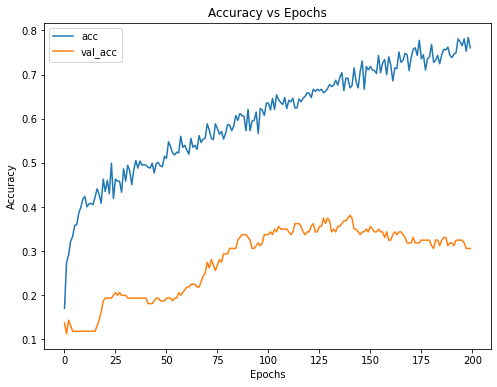

In [82]:
plot_acc(model.history)

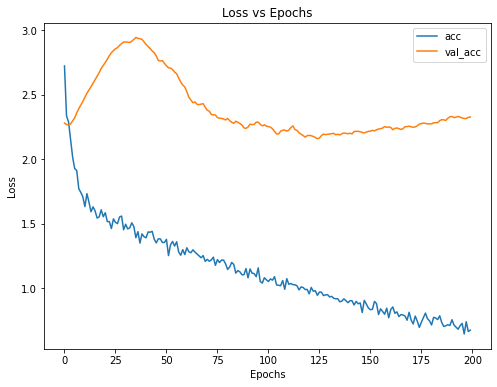

In [83]:
plot_loss(model.history)

## Combining Both Features

In [86]:
df1 = pd.read_csv("../Datasets/Extracted_Features.csv")
df1.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [87]:
df2 = pd.read_csv("../Datasets/Extracted_Features_Chroma.csv")
df2.head()

,features,class
0,"[0.36224282, 0.36781698, 0.43983436, 0.2446917...",blues
1,"[0.4600403, 0.35018247, 0.3208068, 0.21147157,...",blues
2,"[0.27290025, 0.19595261, 0.31516546, 0.4079862...",blues
3,"[0.34137166, 0.40862367, 0.52431905, 0.5470129...",blues
4,"[0.1926048, 0.3172665, 0.39202204, 0.25582698,...",blues


In [88]:
df1['features'] = df1['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))
df2['features'] = df2['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [91]:
X1 = np.array(df1['features'].tolist())
X2 = np.array(df2['features'].tolist())
y = np.array(df1['class'].tolist())

In [92]:
X1.shape, X2.shape

((999, 40), (999, 12))

In [93]:
# y = np.array(pd.get_dummies(y))
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [94]:
y.shape

(999, 10)

In [98]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=101)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=101)

In [99]:
num_classes = y.shape[1]
num_classes

10

In [128]:
inputA = Input(shape=(40,))
inputB = Input(shape=(12,))

x = Dense(128, activation="relu")(inputA)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(inputA)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Model(inputs=inputA, outputs=x)

y = Dense(128, activation="relu")(inputB)
y = Dropout(0.4)(y)
y = BatchNormalization()(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.3)(y)
y = BatchNormalization()(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.3)(y)
y = BatchNormalization()(y)
y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# combined outputs
z = Dense(128, activation="relu")(combined)
z = Dropout(0.3)(z)
z = BatchNormalization()(z)
z = Dense(10, activation="softmax")(z)

model = Model(inputs=[x.input, y.input], outputs=z)
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_91 (Dense)               (None, 128)          1664        ['input_16[0][0]']               
                                                                                                  
 dropout_67 (Dropout)           (None, 128)          0           ['dense_91[0][0]']               
                                                                                                  
 batch_normalization_50 (BatchN  (None, 128)         512         ['dropout_67[0][0]']             
 ormalization)                                                                             

In [129]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [130]:
model.fit(x=[X1_train, X2_train], y=y_train, validation_split=0.2, epochs=200, batch_size=64)

Epoch 1/200
10/10 [==============================] - 2s 44ms/step - loss: 2.7093 - accuracy: 0.1565 - val_loss: 3.5932 - val_accuracy: 0.1813
Epoch 2/200
10/10 [==============================] - 0s 18ms/step - loss: 2.1175 - accuracy: 0.2879 - val_loss: 3.7348 - val_accuracy: 0.1875
Epoch 3/200
10/10 [==============================] - 0s 17ms/step - loss: 1.9295 - accuracy: 0.3568 - val_loss: 3.0090 - val_accuracy: 0.2313
Epoch 4/200
10/10 [==============================] - 0s 16ms/step - loss: 1.7564 - accuracy: 0.3944 - val_loss: 2.6611 - val_accuracy: 0.2625
Epoch 5/200
10/10 [==============================] - 0s 17ms/step - loss: 1.6480 - accuracy: 0.4085 - val_loss: 2.4734 - val_accuracy: 0.2875
Epoch 6/200
10/10 [==============================] - 0s 17ms/step - loss: 1.5505 - accuracy: 0.4413 - val_loss: 2.2467 - val_accuracy: 0.2937
Epoch 7/200
10/10 [==============================] - 0s 16ms/step - loss: 1.4419 - accuracy: 0.4930 - val_loss: 2.0527 - val_accuracy: 0.3187
Epoch 

10/10 [==============================] - 0s 16ms/step - loss: 0.2083 - accuracy: 0.9311 - val_loss: 1.5144 - val_accuracy: 0.6438
Epoch 116/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1696 - accuracy: 0.9499 - val_loss: 1.4979 - val_accuracy: 0.6500
Epoch 117/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1796 - accuracy: 0.9452 - val_loss: 1.4401 - val_accuracy: 0.6625
Epoch 118/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1770 - accuracy: 0.9421 - val_loss: 1.4429 - val_accuracy: 0.6750
Epoch 119/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1530 - accuracy: 0.9531 - val_loss: 1.4825 - val_accuracy: 0.6438
Epoch 120/200
10/10 [==============================] - 0s 15ms/step - loss: 0.2069 - accuracy: 0.9280 - val_loss: 1.4750 - val_accuracy: 0.6187
Epoch 121/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1494 - accuracy: 0.9484 - val_loss: 1.4654 - val_accuracy: 0.6375
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1563 - accuracy: 0.9468 - val_loss: 1.6984 - val_accuracy: 0.6187
Epoch 173/200
10/10 [==============================] - 0s 16ms/step - loss: 0.1270 - accuracy: 0.9593 - val_loss: 1.6642 - val_accuracy: 0.6438
Epoch 174/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0876 - accuracy: 0.9797 - val_loss: 1.7081 - val_accuracy: 0.6250
Epoch 175/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1326 - accuracy: 0.9515 - val_loss: 1.7311 - val_accuracy: 0.6375
Epoch 176/200
10/10 [==============================] - 0s 17ms/step - loss: 0.1260 - accuracy: 0.9577 - val_loss: 1.7650 - val_accuracy: 0.6375
Epoch 177/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1236 - accuracy: 0.9687 - val_loss: 1.7355 - val_accuracy: 0.6375
Epoch 178/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 1.7214 - val_accuracy:

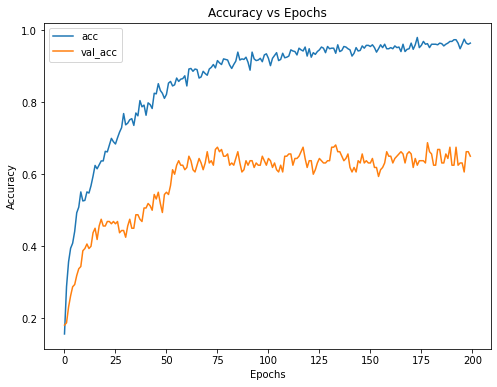

In [131]:
plot_acc(model.history)

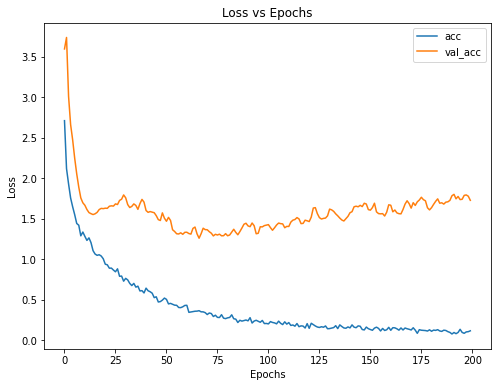

In [132]:
plot_loss(model.history)

In [133]:
test_accuracy = model.evaluate([X1_test, X2_test], y_test)
print("Test Accuracy:", test_accuracy[1])

7/7 [==============================] - 0s 7ms/step - loss: 2.0082 - accuracy: 0.6550
Test Accuracy: 0.6549999713897705


In [134]:
model.save_weights('../Models/checkpoints/mfcc_chroma_combined')

In [135]:
model.save('../Models/saved_models/mfcc_chroma_combined')

INFO:tensorflow:Assets written to: ../Models/saved_models/mfcc_chroma_combined\assets


## Mel Spectrogram data and extracted features

In [7]:
df_mel = pd.read_csv('../Data/features_30_sec.csv')
df_mel.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
df_mel.shape

(1000, 60)

In [9]:
df_mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

## Combined Image and Extracted Features as input

In [8]:
df = pd.read_csv("../Datasets/Extracted_Features.csv")
df.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [9]:
df['features'] = df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [10]:
X1 = np.array(df['features'].tolist())
y1 = np.array(df['class'].tolist())

In [11]:
label_encoder = LabelEncoder()
y1 = to_categorical(label_encoder.fit_transform(y1))

In [12]:
X1.shape, y1.shape

((999, 40), (999, 10))

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [14]:
num_classes = y1.shape[1]
num_classes

10

In [15]:
image_dataset_path = "../Data/images_original/"

In [16]:
metadata = pd.read_csv('../Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [17]:
img_name = ''.join(metadata['filename'].iloc[0].split('.')[0:-1])+'.png'
img_name

'blues00000.png'

In [18]:
image = Image.open('../Data/images_original/blues/'+img_name).convert('L')

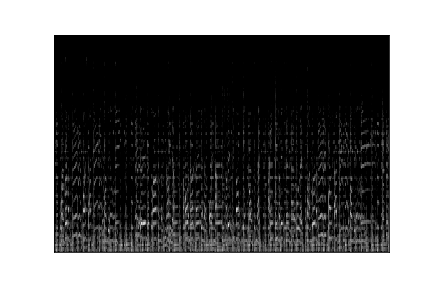

In [19]:
image

In [20]:
image
image = image.resize((48, 32))
data = np.asarray(image)
data = data.reshape(48, 32, 1)

In [21]:
data.shape

(48, 32, 1)

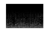

In [22]:
image

In [23]:
X = []
y = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        img_name = ''.join(row['filename'].split('.')[0:-1])+'.png'
        file_name = os.path.join(os.path.abspath(image_dataset_path), str(row["label"])+"/", img_name)
        final_class_label = row["label"]
        img = Image.open(file_name).convert('L')
        img = img.resize((48, 32))
        data = np.asarray(img)
        data = data.reshape(48, 32, 1)
        X.append(data)
        y.append(final_class_label)
    except:
        pass

1000it [00:01, 533.89it/s]


In [24]:
len(X)

999

In [25]:
X = np.array(X)
X.shape

(999, 48, 32, 1)

In [26]:
y = np.array(y)
y.shape

(999,)

In [27]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
X2_train = X2_train / 255
X2_test = X2_test / 255

In [30]:
X2_train.shape, y2_train.shape

((799, 48, 32, 1), (799, 10))

In [31]:
X1_train.shape

(799, 40)

In [32]:
y1_train[0], y2_train[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [64]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 32, 1, )))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 44, 28, 64)        1664      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 22, 14, 64)        0         
                                                                 
 batch_normalization_31 (Bat  (None, 22, 14, 64)       256       
 chNormalization)                                                
                                                                 
 flatten_9 (Flatten)         (None, 19712)             0         
                                                                 
 dense_31 (Dense)            (None, 128)              

In [68]:
num_epochs = 150
num_batch_size = 64

model.fit(X2_train, y2_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 0s 20ms/step - loss: 1.3521 - accuracy: 0.4820 - val_loss: 1.6118 - val_accuracy: 0.4313
Epoch 2/150
10/10 [==============================] - 0s 13ms/step - loss: 1.3180 - accuracy: 0.5258 - val_loss: 1.5227 - val_accuracy: 0.4625
Epoch 3/150
10/10 [==============================] - 0s 13ms/step - loss: 1.3283 - accuracy: 0.5117 - val_loss: 1.4871 - val_accuracy: 0.4812
Epoch 4/150
10/10 [==============================] - 0s 13ms/step - loss: 1.3277 - accuracy: 0.5149 - val_loss: 1.5131 - val_accuracy: 0.4875
Epoch 5/150
10/10 [==============================] - 0s 12ms/step - loss: 1.3818 - accuracy: 0.4992 - val_loss: 1.5174 - val_accuracy: 0.4625
Epoch 6/150
10/10 [==============================] - 0s 12ms/step - loss: 1.3931 - accuracy: 0.4867 - val_loss: 1.7763 - val_accuracy: 0.3688
Epoch 7/150
10/10 [==============================] - 0s 12ms/step - loss: 1.3141 - accuracy: 0.5149 - val_loss: 1.4783 - val_accuracy: 0.4875
Epoch 

10/10 [==============================] - 0s 12ms/step - loss: 0.8540 - accuracy: 0.6823 - val_loss: 1.5805 - val_accuracy: 0.4437
Epoch 116/150
10/10 [==============================] - 0s 12ms/step - loss: 0.9292 - accuracy: 0.6698 - val_loss: 1.5090 - val_accuracy: 0.4563
Epoch 117/150
10/10 [==============================] - 0s 12ms/step - loss: 0.9147 - accuracy: 0.6870 - val_loss: 1.4078 - val_accuracy: 0.5125
Epoch 118/150
10/10 [==============================] - 0s 13ms/step - loss: 0.8958 - accuracy: 0.6854 - val_loss: 1.4396 - val_accuracy: 0.5250
Epoch 119/150
10/10 [==============================] - 0s 12ms/step - loss: 0.8481 - accuracy: 0.7011 - val_loss: 1.5048 - val_accuracy: 0.4750
Epoch 120/150
10/10 [==============================] - 0s 12ms/step - loss: 0.9797 - accuracy: 0.6620 - val_loss: 1.4479 - val_accuracy: 0.5125
Epoch 121/150
10/10 [==============================] - 0s 12ms/step - loss: 0.8983 - accuracy: 0.6667 - val_loss: 1.5802 - val_accuracy: 0.4688
Epoch 

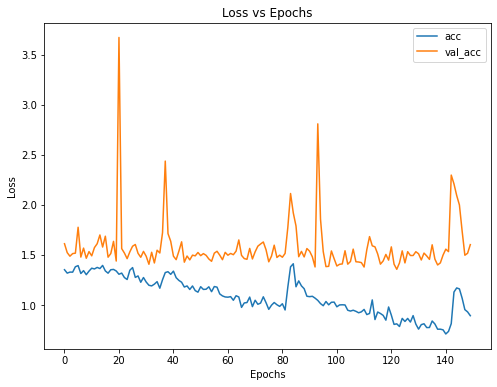

In [69]:
plot_loss(model.history)

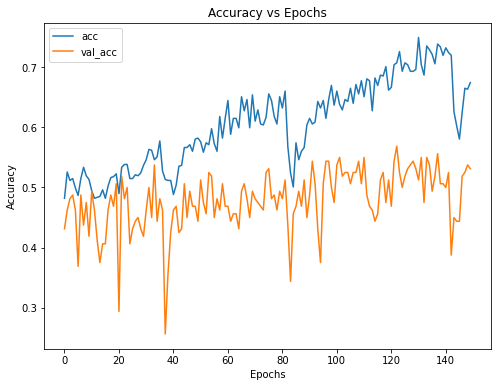

In [70]:
plot_acc(model.history)

Combining Image and Audio input

In [57]:
from tensorflow.keras.regularizers import L2

In [66]:
inputA = Input(shape=(40,))
inputB = Input(shape=(48, 32, 1, ))

x = Dense(128, activation="relu")(inputA)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Model(inputs=inputA, outputs=x)

y = Conv2D(64, kernel_size=(5, 5) ,activation="relu", input_shape=(48, 32, 1, ))(inputB)
y = MaxPool2D((2, 2))(y)
y = Dropout(0.4)(y)
y = BatchNormalization()(y)
y = Flatten()(y)
y = Dense(128, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01))(y)
y = Dropout(0.4)(y)
y = BatchNormalization()(y)

y = Model(inputs=inputB, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# combined outputs
z = Dense(128, activation="relu")(combined)
z = Dropout(0.45)(z)
z = BatchNormalization()(z)
z = Dense(128, activation="relu", kernel_initializer="he_normal", kernel_regularizer=L2(0.01))(combined)
z = Dropout(0.35)(z)
z = BatchNormalization()(z)
z = Dense(10, activation="softmax")(z)

model = Model(inputs=[x.input, y.input], outputs=z)
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 48, 32, 1)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 44, 28, 64)   1664        ['input_18[0][0]']               
                                                                                                  
 input_17 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 22, 14, 64)  0           ['conv2d_8[0][0]']               
                                                                                           

In [67]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
y1_train.shape, y2_train.shape

((799, 10), (799, 10))

In [69]:
model.fit(x=[X1_train, X2_train], y=y2_train, validation_split=0.2, epochs=200, batch_size=128)

Epoch 1/200
5/5 [==============================] - 1s 67ms/step - loss: 7.8448 - accuracy: 0.1268 - val_loss: 9.0234 - val_accuracy: 0.0750
Epoch 2/200
5/5 [==============================] - 0s 22ms/step - loss: 7.2405 - accuracy: 0.2066 - val_loss: 9.1987 - val_accuracy: 0.1000
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 6.8425 - accuracy: 0.2363 - val_loss: 9.0812 - val_accuracy: 0.1312
Epoch 4/200
5/5 [==============================] - 0s 22ms/step - loss: 6.3158 - accuracy: 0.3005 - val_loss: 8.5479 - val_accuracy: 0.1437
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 5.9376 - accuracy: 0.3255 - val_loss: 7.7691 - val_accuracy: 0.1688
Epoch 6/200
5/5 [==============================] - 0s 22ms/step - loss: 5.5523 - accuracy: 0.3224 - val_loss: 7.0287 - val_accuracy: 0.1750
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: 5.1920 - accuracy: 0.3991 - val_loss: 6.4840 - val_accuracy: 0.1937
Epoch 8/200
5/5 [===

5/5 [==============================] - 0s 21ms/step - loss: 0.9669 - accuracy: 0.7887 - val_loss: 1.6245 - val_accuracy: 0.5875
Epoch 118/200
5/5 [==============================] - 0s 21ms/step - loss: 0.9764 - accuracy: 0.8028 - val_loss: 1.6467 - val_accuracy: 0.5750
Epoch 119/200
5/5 [==============================] - 0s 21ms/step - loss: 0.9707 - accuracy: 0.7825 - val_loss: 1.6346 - val_accuracy: 0.5875
Epoch 120/200
5/5 [==============================] - 0s 22ms/step - loss: 0.9250 - accuracy: 0.8232 - val_loss: 1.6357 - val_accuracy: 0.5750
Epoch 121/200
5/5 [==============================] - 0s 22ms/step - loss: 0.9492 - accuracy: 0.8059 - val_loss: 1.6723 - val_accuracy: 0.5938
Epoch 122/200
5/5 [==============================] - 0s 21ms/step - loss: 0.9292 - accuracy: 0.8153 - val_loss: 1.6802 - val_accuracy: 0.5875
Epoch 123/200
5/5 [==============================] - 0s 21ms/step - loss: 0.9409 - accuracy: 0.8028 - val_loss: 1.7152 - val_accuracy: 0.5562
Epoch 124/200
5/5 [=

Epoch 175/200
5/5 [==============================] - 0s 21ms/step - loss: 0.7020 - accuracy: 0.8670 - val_loss: 1.5585 - val_accuracy: 0.6250
Epoch 176/200
5/5 [==============================] - 0s 20ms/step - loss: 0.6708 - accuracy: 0.8717 - val_loss: 1.6341 - val_accuracy: 0.6125
Epoch 177/200
5/5 [==============================] - 0s 21ms/step - loss: 0.6198 - accuracy: 0.8905 - val_loss: 1.6741 - val_accuracy: 0.6000
Epoch 178/200
5/5 [==============================] - 0s 22ms/step - loss: 0.6820 - accuracy: 0.8685 - val_loss: 1.5982 - val_accuracy: 0.5938
Epoch 179/200
5/5 [==============================] - 0s 21ms/step - loss: 0.6916 - accuracy: 0.8623 - val_loss: 1.5734 - val_accuracy: 0.6313
Epoch 180/200
5/5 [==============================] - 0s 21ms/step - loss: 0.6360 - accuracy: 0.8826 - val_loss: 1.5600 - val_accuracy: 0.6250
Epoch 181/200
5/5 [==============================] - 0s 21ms/step - loss: 0.6580 - accuracy: 0.8670 - val_loss: 1.5650 - val_accuracy: 0.5938
Epoch 

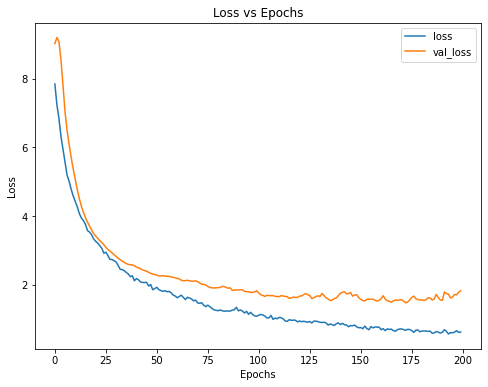

In [73]:
plot_loss(model.history)

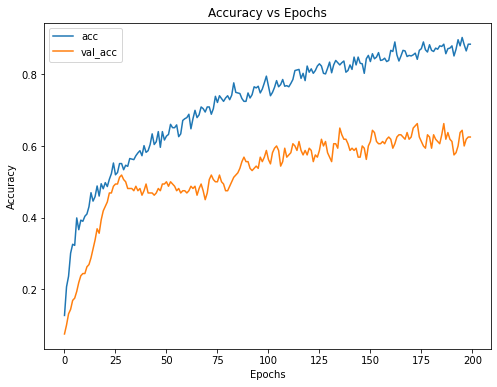

In [74]:
plot_acc(model.history)